# Data Visualization
### Activity 2 -Exploratory Data Analysis I
24th November 2023 <br> Fall 2023

---
### **Group 36:**
Tomás Bensimon - 43022 <br>
Cristina Tiago - 58636 <br>
Martim Esteves - 46953 <br>

---

### Imports & Setup

In [48]:
import os
path = os.path.join(os.getcwd(), 'Group Project')

import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)

import matplotlib.pyplot as plt
import seaborn as sns

# Color Setup

color_pallete = ["#edf8fb", "#b3cde3", "#8c96c6", "#8856a7",
                 "#810f7c"]

sns.set_style("dark")
display(sns.color_palette(color_pallete))

sns.set_palette(sns.color_palette(color_pallete))

[(0.9294117647058824, 0.9725490196078431, 0.984313725490196),
 (0.7019607843137254, 0.803921568627451, 0.8901960784313725),
 (0.5490196078431373, 0.5882352941176471, 0.7764705882352941),
 (0.5333333333333333, 0.33725490196078434, 0.6549019607843137),
 (0.5058823529411764, 0.058823529411764705, 0.48627450980392156)]

In [49]:
athlete_events = pd.read_csv('athlete_events.csv')
display(athlete_events.head(5))
country_definitions = pd.read_csv('country_definitions.csv')
display(country_definitions.head(5))
gdp = pd.read_csv('gdp_csv.csv')
display(gdp.head(5))
population = pd.read_csv('population.csv')
display(population.head(5))

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.00,180.00,80.00,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.00,170.00,60.00,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.00,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.00,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.00,185.00,82.00,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,25760683041.09
1,Arab World,ARB,1969,28434203615.48
2,Arab World,ARB,1970,31385499664.07
3,Arab World,ARB,1971,36426909888.39
4,Arab World,ARB,1972,43316056615.46


,geo,name,time,Population
0,afg,Afghanistan,1800,3280000.00
1,afg,Afghanistan,1801,3280000.00
2,afg,Afghanistan,1802,3280000.00
3,afg,Afghanistan,1803,3280000.00
4,afg,Afghanistan,1804,3280000.00


<b><font size="5">Data Exploration</font><a class="anchor"><a id='toc'></a></b><br><br>

<b><font size="4">Descriptive Statistics</font><a class="anchor"><a id='toc'></a></b><br><br>

In [50]:
athlete_events.shape

(271116, 15)

In [51]:
athlete_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [52]:
athlete_events.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,271116.00,68248.95,39022.29,1.00,34643.00,68205.00,102097.25,135571.00
Age,261642.00,25.56,6.39,10.00,21.00,24.00,28.00,97.00
Height,210945.00,175.34,10.52,127.00,168.00,175.00,183.00,226.00
Weight,208241.00,70.70,14.35,25.00,60.00,70.00,79.00,214.00
Year,271116.00,1978.38,29.88,1896.00,1960.00,1988.00,2002.00,2016.00


In [53]:
athlete_events.count()

ID        271116
Name      271116
Sex       271116
Age       261642
Height    210945
Weight    208241
Team      271116
NOC       271116
Games     271116
Year      271116
Season    271116
City      271116
Sport     271116
Event     271116
Medal      39783
dtype: int64

In [54]:
athlete_events.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

<b><font size="5">Height</font><a class="anchor"><a id='toc'></a></b><br><br>

In [55]:
height_freq = athlete_events['Height'].value_counts().sort_index()
display(height_freq)

127.00    7
128.00    1
130.00    2
131.00    2
132.00    9
         ..
219.00    2
220.00    6
221.00    4
223.00    4
226.00    3
Name: Height, Length: 95, dtype: int64

<Axes: xlabel='Height'>

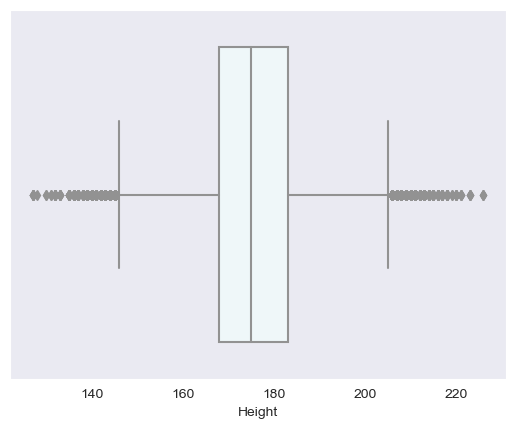

In [56]:
sns.boxplot(x='Height',data=athlete_events)

In [57]:
height_max = athlete_events['Height'].max()
height_min = athlete_events['Height'].min()
height_q1 = athlete_events['Height'].quantile(0.25)
height_q2 = athlete_events['Height'].quantile(0.5)
height_q3 = athlete_events['Height'].quantile(0.75)
height_iqr = height_q3 - height_q1
height_outliers = athlete_events['Height'][(athlete_events['Height'] < height_q1 - 1.5 * height_iqr) | (athlete_events['Height'] > height_q3 + 1.5 * height_iqr)].count()
height_values_count = athlete_events['Height'].isnull().sum()
print('Max Height:', height_max, '\nMin Height:', height_min, '\nHeight Range:', height_max - height_min)
print('Q1:', height_q1, '\nQ2:', height_q2, '\nQ3:', height_q3, '\nIQR:', height_iqr, '\nNumber of Outliers:', height_outliers, '({}%)'.format(round((height_outliers / athlete_events['Height'].notna().sum()) * 100, 2)))


Max Height: 226.0 
Min Height: 127.0 
Height Range: 99.0
Q1: 168.0 
Q2: 175.0 
Q3: 183.0 
IQR: 15.0 
Number of Outliers: 1338 (0.63%)


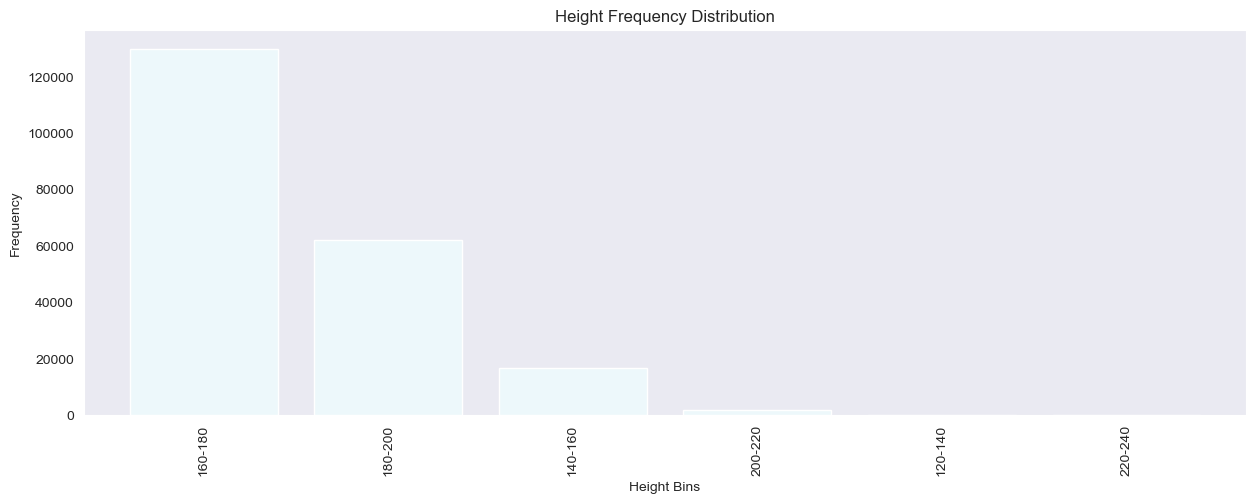

In [58]:
bins = [120, 140, 160, 180, 200, 220, 240]
labels = ['120-140', '140-160', '160-180', '180-200', '200-220', '220-240']

athlete_events['Height_Bins'] = pd.cut(athlete_events['Height'], bins=bins, labels=labels, include_lowest=True)

height_freq = athlete_events['Height_Bins'].value_counts()

plt.figure(figsize=(15, 5))
height_freq.plot(kind='bar', width=0.8)

plt.xlabel('Height Bins')
plt.ylabel('Frequency')
plt.title('Height Frequency Distribution')

plt.show()


<Axes: xlabel='Height', ylabel='Count'>

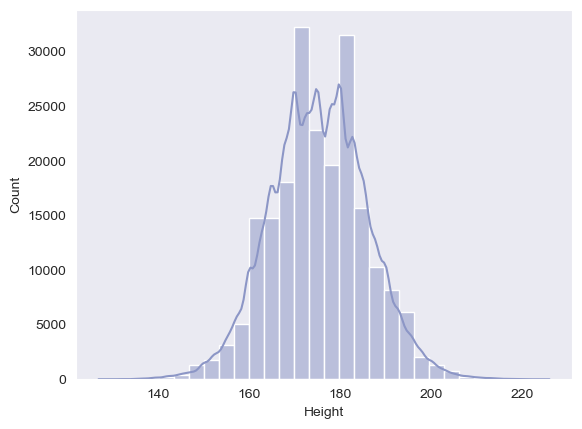

In [59]:
sns.histplot(data=athlete_events, x=athlete_events['Height'], bins= 30, color=color_pallete[2], kde=True)

<b><font size="5">Weight</font><a class="anchor"><a id='toc'></a></b><br><br>

In [60]:
weight_freq = athlete_events['Weight'].value_counts().sort_index()
display(weight_freq)

25.00      6
28.00     14
30.00     42
31.00     23
32.00     41
          ..
180.00     1
182.00     2
190.00     1
198.00     1
214.00     2
Name: Weight, Length: 220, dtype: int64

<Axes: xlabel='Weight'>

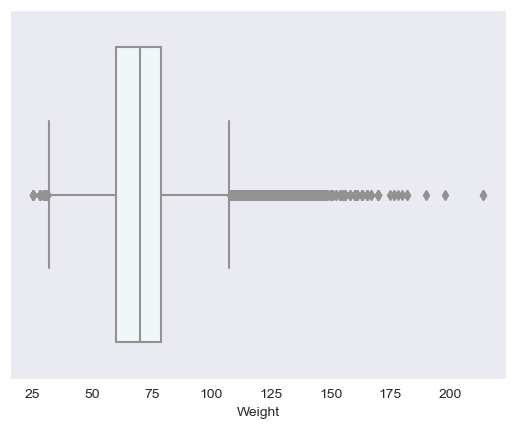

In [61]:
sns.boxplot(x='Weight',data=athlete_events)

In [62]:
weight_max = athlete_events['Weight'].max()
weight_min = athlete_events['Weight'].min()
weight_q1 = athlete_events['Weight'].quantile(0.25)
weight_q2 = athlete_events['Weight'].quantile(0.5)
weight_q3 = athlete_events['Weight'].quantile(0.75)
weight_iqr = weight_q3 - weight_q1
weight_outliers = athlete_events['Weight'][(athlete_events['Weight'] < weight_q1 - 1.5 * weight_iqr) | (athlete_events['Weight'] > weight_q3 + 1.5 * weight_iqr)].count()
weight_values_count = athlete_events['Weight'].isnull().sum()
print('Max Weight:', weight_max, '\nMin Weight:', weight_min, '\nWeight Range:', weight_max - weight_min)
print('Q1:', weight_q1, '\nQ2:', weight_q2, '\nQ3:', weight_q3, '\nIQR:', weight_iqr, '\nNumber of Outliers:', weight_outliers, '({}%)'.format(round((weight_outliers / athlete_events['Weight'].notna().sum()) * 100, 2)))

Max Weight: 214.0 
Min Weight: 25.0 
Weight Range: 189.0
Q1: 60.0 
Q2: 70.0 
Q3: 79.0 
IQR: 19.0 
Number of Outliers: 3237 (1.55%)


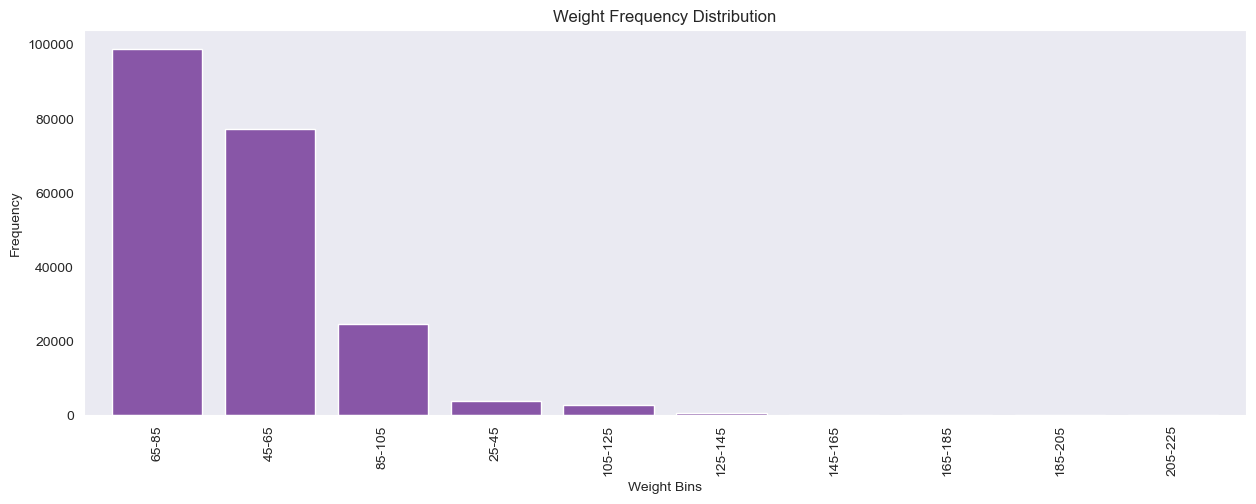

In [63]:
weight_bins = [25, 45, 65, 85, 105, 125, 145, 165, 185, 205, 225]
weight_labels = ['25-45', '45-65', '65-85', '85-105', '105-125', '125-145', '145-165', '165-185', '185-205', '205-225']

athlete_events['Weight_Bins'] = pd.cut(athlete_events['Weight'], bins=weight_bins, labels=weight_labels, include_lowest=True)

weight_freq = athlete_events['Weight_Bins'].value_counts()

plt.figure(figsize=(15, 5))
weight_freq.plot(kind='bar', width=0.8,color=color_pallete[3])

plt.xlabel('Weight Bins')
plt.ylabel('Frequency')
plt.title('Weight Frequency Distribution')

plt.show()


<Axes: xlabel='Weight', ylabel='Count'>

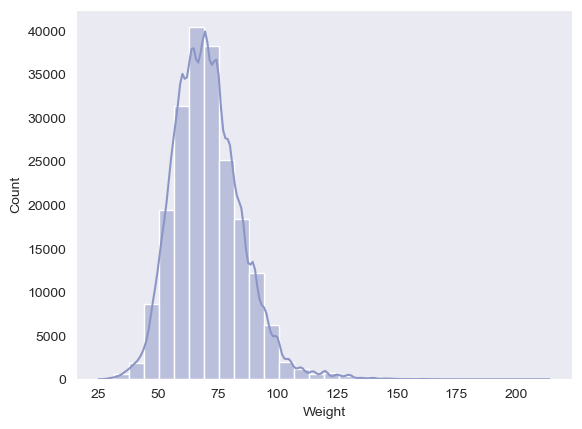

In [64]:
sns.histplot(data=athlete_events, x=athlete_events['Weight'], bins= 30, color=color_pallete[2], kde=True)

In [86]:
athlete_events1 = athlete_events.dropna(subset=['Height', 'Weight']).reset_index()
athlete_events1 = athlete_events1[(athlete_events1['Year'] > 1960) & (athlete_events1['Season'] == 'Summer')].reset_index(drop=True)
mean_height = athlete_events1.groupby(['Team', 'Medal', 'Sport'])['Height'].mean().reset_index()
mean_height.head()


,Games,Team,Medal,Sport,Height
0,1964 Summer,Aphrodite,Bronze,Sailing,182.00
1,1964 Summer,Argentina,Silver,Equestrianism,170.00
2,1964 Summer,Australia,Bronze,Athletics,167.00
3,1964 Summer,Australia,Bronze,Hockey,175.86
4,1964 Summer,Australia,Bronze,Judo,183.00


In [87]:
mean_weight = athlete_events1.groupby(['Games', 'Team','Medal','Sport'])['Weight'].mean().reset_index()
mean_weight.head()

,Games,Team,Medal,Sport,Weight
0,1964 Summer,Aphrodite,Bronze,Sailing,80.33
1,1964 Summer,Argentina,Silver,Equestrianism,65.00
2,1964 Summer,Australia,Bronze,Athletics,58.50
3,1964 Summer,Australia,Bronze,Hockey,74.36
4,1964 Summer,Australia,Bronze,Judo,104.00


In [100]:
sports_over_years = athlete_events1.groupby(['Year', 'Sport'])[['Height', 'Weight']].mean()
sports_over_years.head()


Height  Weight
Year Sport                     
1964 Athletics   175.86   69.52
     Basketball  189.92   84.54
     Boxing      171.08   64.11
     Canoeing    176.14   73.67
     Cycling     174.26   69.96

In [89]:
avg_height = athlete_events1.groupby('Year')['Height'].mean()
avg_weight = athlete_events1.groupby('Year')['Weight'].mean()

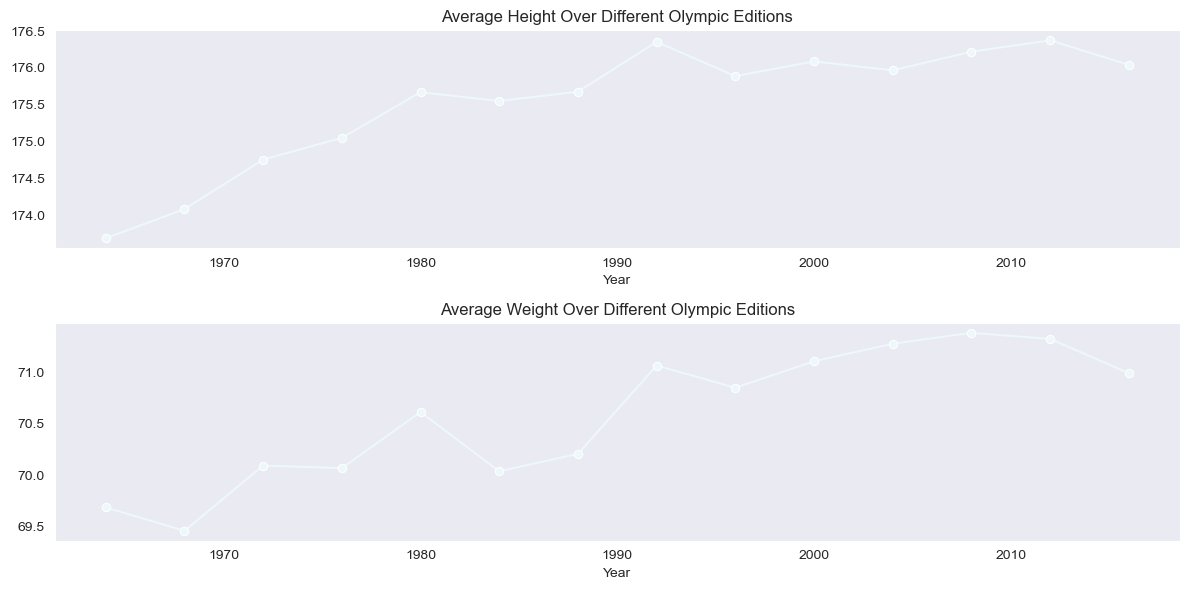

In [90]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
sns.lineplot(x=avg_height.index, y=avg_height.values, marker='o')
plt.title('Average Height Over Different Olympic Editions')

plt.subplot(2, 1, 2)
sns.lineplot(x=avg_weight.index, y=avg_weight.values, marker='o')
plt.title('Average Weight Over Different Olympic Editions')

plt.tight_layout()
plt.show()